In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.

In [2]:
data = pd.read_csv('./all.csv')
impute = pd.read_csv('data1.csv')
data['carId'].iloc[:29966] = impute['carId']
data.drop('Unnamed: 0', axis=1, inplace=True)
data.dropna(how='any', axis=0, inplace=True)
data

,tradeTime,brand,serial,model,mileage,color,cityId,carCode,tansferCount,seatings,...,unknown8,unknown9,unknown10,unknown12,unknown13,price,unknown11_1,unknown11_2,unknown11_3,carId
0,0.509589,1,1,1,4.01,1,1,1.0,0,5,...,5.0,2.0,5.964053,3.824658,1,4.24,4.220,1.740,1.625,1.0
1,0.517808,2,2,2,8.60,1,2,1.0,0,5,...,4.0,3.0,19.289185,4.816438,2,7.38,4.630,1.775,1.480,2.0
2,0.534247,5,5,5,15.56,1,2,3.0,0,5,...,4.0,3.0,5.964053,14.254795,2,1.00,4.515,1.725,1.445,5.0
3,0.506849,6,6,6,6.04,1,3,1.0,3,5,...,5.0,2.0,5.964053,4.912329,2,4.38,4.500,1.834,1.707,6.0
4,0.504110,7,7,7,5.70,4,1,2.0,2,5,...,5.0,2.0,5.964053,9.252055,1,5.90,4.315,1.783,1.606,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29961,0.600000,34,588,4169,10.38,5,35,3.0,0,5,...,5.0,2.0,5.964053,11.501370,1,0.88,4.295,1.705,1.570,18531.0
29962,1.578082,12,92,1797,11.69,2,1,2.0,2,5,...,4.0,3.0,19.289185,8.427397,2,8.30,4.960,1.845,1.480,4294.0
29963,1.260274,7,113,501,9.87,6,1,2.0,0,5,...,4.0,3.0,5.964053,11.498630,2,5.00,4.665,1.700,1.510,20584.0
29964,1.142466,45,131,3024,9.57,1,1,1.0,1,5,...,4.0,3.0,32.925907,5.279452,1,28.00,4.915,1.820,1.450,11490.0


In [3]:
data = data[['serial', 'model', 'newPrice', 'useTime', 'productionTime', 'mileage',
             'gearbox', 'country', 'cityId', 'price', 'brand', 'time']]
data

,serial,model,newPrice,useTime,productionTime,mileage,gearbox,country,cityId,price,brand,time
0,1,1,6.88,3.421918,3.575342,4.01,1.0,779413.0,1,4.24,1,4.0
1,2,2,11.98,4.265753,4.567123,8.60,2.0,779415.0,2,7.38,2,4.0
2,5,5,12.78,13.317808,13.389041,15.56,4.0,779416.0,2,1.00,5,13.0
3,6,6,9.49,4.805479,4.912329,6.04,2.0,779413.0,3,4.38,6,5.0
4,7,7,18.08,8.843836,8.917808,5.70,5.0,779415.0,1,5.90,7,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29961,588,4169,11.86,14.180822,14.323288,10.38,6.0,779413.0,35,0.88,34,15.0
29962,92,1797,20.28,8.073973,8.263014,11.69,22.0,779415.0,1,8.30,12,9.0
29963,113,501,14.58,8.654795,8.830137,9.87,4.0,779415.0,1,5.00,7,12.0
29964,131,3024,35.40,4.484932,4.610959,9.57,25.0,779415.0,1,28.00,45,6.0


In [4]:
data['brand'].nunique()

125

In [5]:
think = data[data['price'] > data['newPrice']][['price', 'newPrice']]
think['point'] = think['newPrice'] - think['price']
_ = think[(think['point'] / think['newPrice']).abs() > .3]
data.drop(index=_.index, axis=0, inplace=True)

In [6]:
data['Range'] = (data['newPrice'] - data['price']) / data['newPrice']
brand_group = data.groupby('brand')
brand = data['brand'].unique()
brand

array([  1,   2,   5,   6,   7,  10,   8,  13,  12,  15,  16,  21,  22,
        23,  24,  25,  18,  19,  11,  26,  37,  28,   9,  33,  40,  43,
        42,  38,   4,  32,  20,  27,  30,  17,  47,  49,  50,  39,  34,
        53,   3,  44,  56,  57,  52,  62,  63,  65,  66,  68,  72,  36,
        29,  54,  79,  14,  61,  77,  64,  75,  51,  85,  71,  87,  74,
        89,  35,  90,  59,  82,  83,  92,  45,  55,  78,  48,  97,  46,
        99,  84,  80,  88,  94,  73,  41,  69,  76,  96,  60, 112, 109,
       106, 116, 100,  81, 119, 121, 101, 118, 124, 107, 125,  86, 114,
       103,  98, 128, 104, 133, 110,  58,  67,  93, 102, 113,  95, 131,
       122,  70, 129, 130, 108,  91, 120,  31], dtype=int64)

In [7]:
Range = {}
newPrice = {}
endPrice = {}

for group in brand:
    brand_ = brand_group.get_group(group)
    Range[group] = brand_['Range'].mean()
    newPrice[group] = brand_['newPrice'].mean()
    endPrice[group] = brand_['price'].mean()


In [8]:
brand = pd.DataFrame(data=brand, columns=['brand'])
brand

,brand
0,1
1,2
2,5
3,6
4,7
...,...
120,130
121,108
122,91
123,120


In [9]:
brand['Range'] = Range.values()
brand['newPrice'] = newPrice.values()
brand['endPrice'] = endPrice.values()
brand

,brand,Range,newPrice,endPrice
0,1,0.411894,7.435341,4.374943
1,2,0.382592,24.264558,15.442870
2,5,0.541814,22.064539,10.575471
3,6,0.428801,10.074226,5.813369
4,7,0.471156,17.634340,9.433572
...,...,...,...,...
120,130,0.468938,99.800000,53.000000
121,108,0.725008,306.900000,85.500000
122,91,0.455446,16.160000,8.800000
123,120,0.570312,128.000000,55.000000


In [10]:
brand.sort_values(by='Range')

,brand,Range,newPrice,endPrice
101,125,-0.212972,21.380000,25.933333
89,112,0.091647,10.780000,9.790000
103,114,0.104878,32.800000,29.360000
91,106,0.136531,512.500000,448.833333
86,76,0.194591,7.380000,5.928571
...,...,...,...,...
117,122,0.818451,8.000000,1.479967
82,94,0.828629,27.416667,4.706667
124,31,0.878214,14.780000,1.800000
107,104,0.918657,26.800000,2.180000


In [11]:
most_brand = brand.sort_values(by='Range')['brand'][: 20]
most_brand = most_brand.tolist()
most_brand

[125,
 112,
 114,
 106,
 76,
 71,
 113,
 116,
 73,
 61,
 68,
 42,
 45,
 12,
 121,
 37,
 109,
 2,
 84,
 90]

In [12]:
valuePreservation = pd.DataFrame(columns=data.columns)
for g in most_brand:
    valuePreservation = pd.concat([valuePreservation, brand_group.get_group(g)], axis=0)
valuePreservation

,serial,model,newPrice,useTime,productionTime,mileage,gearbox,country,cityId,price,brand,time,Range
6247,1099,8023,21.38,0.115068,0.172603,0.90,13.0,779413.0,1,24.20,125,0.0,-0.131899
6248,1099,8023,21.38,0.115068,0.230137,0.15,13.0,779413.0,1,26.80,125,0.0,-0.253508
14085,1099,8023,21.38,0.191781,0.575342,0.77,13.0,779413.0,1,26.80,125,0.0,-0.253508
2728,868,3865,11.28,0.767123,0.931507,0.36,3.0,779413.0,23,10.20,112,2.0,0.095745
19441,868,4045,10.28,0.934247,1.147945,1.23,3.0,779413.0,8,9.38,112,2.0,0.087549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25903,468,4009,15.98,1.917808,2.049315,1.48,9.0,779413.0,1,8.38,90,4.0,0.475594
26805,468,11417,14.58,1.945205,2.043836,1.26,9.0,779413.0,1,8.88,90,4.0,0.390947
27053,641,5611,26.98,1.430137,3.509589,0.21,3.0,779413.0,5,19.60,90,5.0,0.273536
27946,468,9957,21.18,1.320548,1.553425,1.12,9.0,779413.0,1,10.50,90,4.0,0.504249


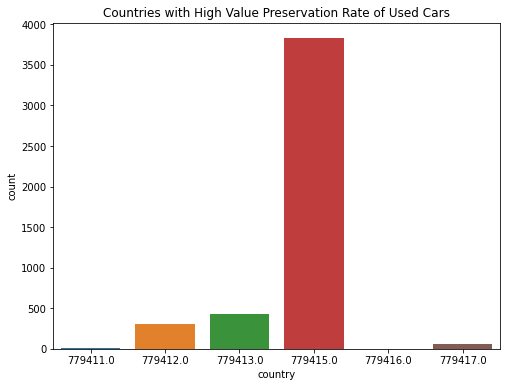

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(valuePreservation['country'])
title = 'Countries with High Value Preservation Rate of Used Cars'
plt.title(title)
plt.savefig('./solve3/' + title + '.png', dpi=800)

<AxesSubplot:xlabel='country', ylabel='count'>

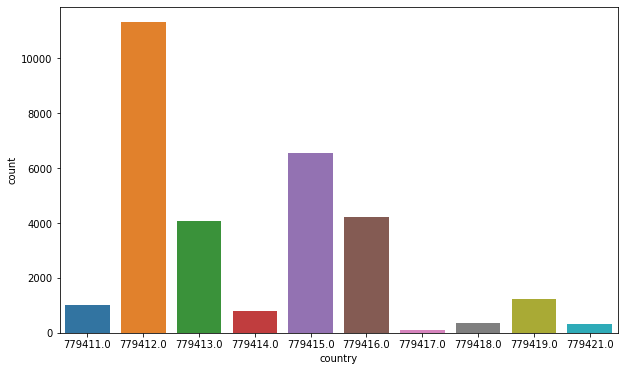

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data['country'])

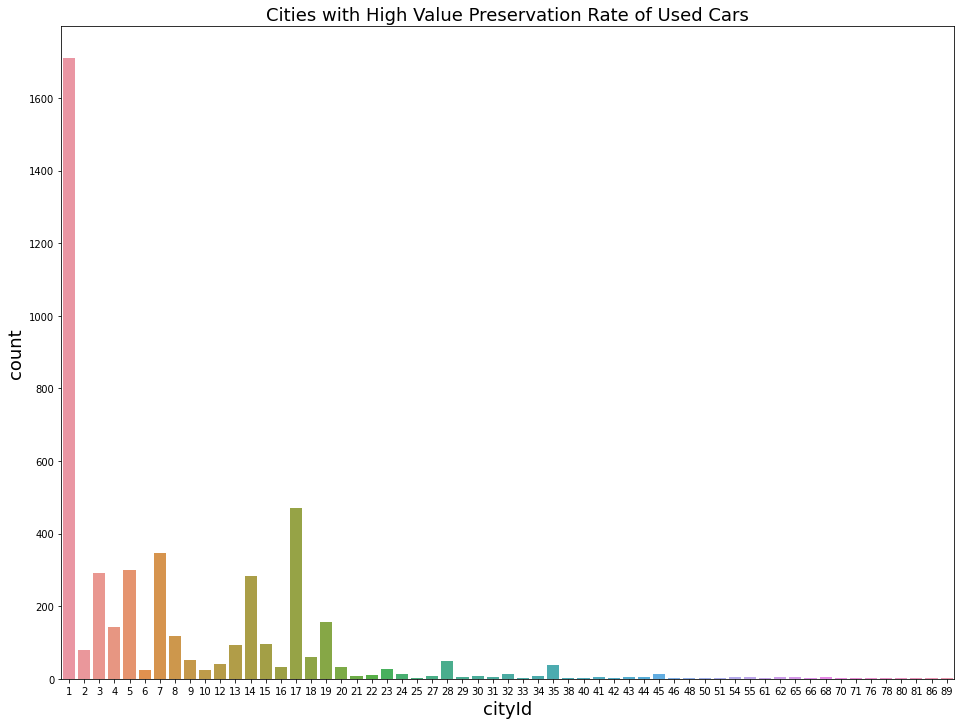

In [17]:
plt.figure(figsize=(16, 12))
sns.countplot(valuePreservation['cityId'])
title = 'Cities with High Value Preservation Rate of Used Cars'
plt.ylabel('count', fontsize=18)
plt.xlabel('cityId', fontsize=18)
plt.title(title, fontsize=18)
plt.savefig('./solve3/' + title + '.png', dpi=800)

In [16]:
least_brand = brand.sort_values(by='Range', ascending=False)['brand'][: 20]
least_brand = least_brand.tolist()
least_brand

[21,
 104,
 31,
 94,
 122,
 56,
 124,
 70,
 95,
 131,
 133,
 40,
 108,
 63,
 49,
 47,
 88,
 43,
 34,
 36]

In [17]:
depreciation = pd.DataFrame(columns=data.columns)
for g in least_brand:
    depreciation = pd.concat([depreciation, brand_group.get_group(g)], axis=0)
depreciation

,serial,model,newPrice,useTime,productionTime,mileage,gearbox,country,cityId,price,brand,time,Range
16,28,31,4.68,10.528767,10.758904,9.56,6.0,779413.0,2,0.10,21,12.0,0.978632
9727,1095,11953,26.80,12.865753,13.369863,15.62,21.0,779413.0,17,2.18,104,14.0,0.918657
29787,69,6731,14.78,10.457534,10.594521,4.89,4.0,779413.0,1,1.80,31,12.0,0.878214
1311,525,2090,28.60,8.238356,8.482192,10.45,3.0,779412.0,19,5.58,94,9.0,0.804895
2422,525,3501,28.60,7.320548,7.616438,9.21,3.0,779412.0,17,5.88,94,8.0,0.794406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24554,81,2626,6.49,4.734247,4.849315,7.25,6.0,779413.0,5,2.98,36,6.0,0.540832
24838,1121,8575,4.99,9.857534,10.019178,6.67,6.0,779413.0,9,1.18,36,11.0,0.763527
25004,676,3914,5.38,9.887671,10.224658,13.17,6.0,779413.0,7,0.70,36,12.0,0.869888
26085,420,3148,6.99,6.893151,7.076712,13.00,6.0,779413.0,5,1.58,36,8.0,0.773963


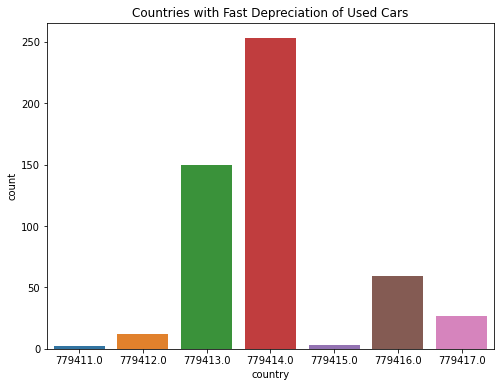

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(depreciation['country'])
title = 'Countries with Fast Depreciation of Used Cars'
plt.title(title)
plt.savefig('./solve3/' + title + '.png', dpi=800)

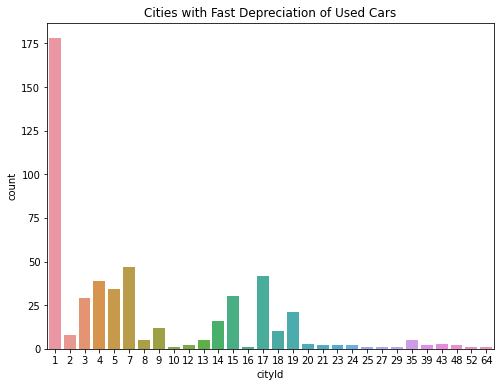

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(depreciation['cityId'])
title = 'Cities with Fast Depreciation of Used Cars'
plt.title(title)
plt.savefig('./solve3/' + title + '.png', dpi=800)

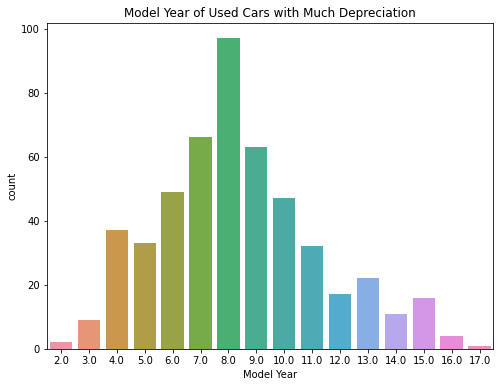

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(depreciation['time'])
plt.xlabel('Model Year')
title = 'Model Year of Used Cars with Much Depreciation'
plt.title(title)
plt.savefig('./solve3/' + title + '.png', dpi=800)

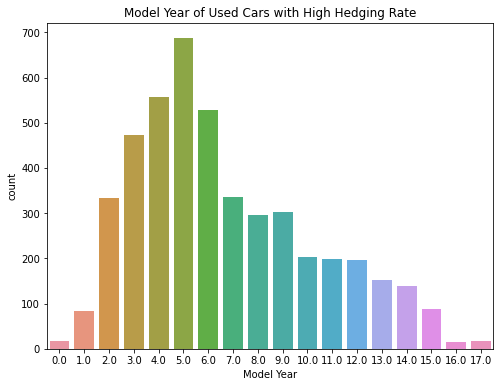

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(valuePreservation['time'])
plt.xlabel('Model Year')
title = 'Model Year of Used Cars with High Hedging Rate'
plt.title(title)
plt.savefig('./solve3/' + title + '.png', dpi=800)

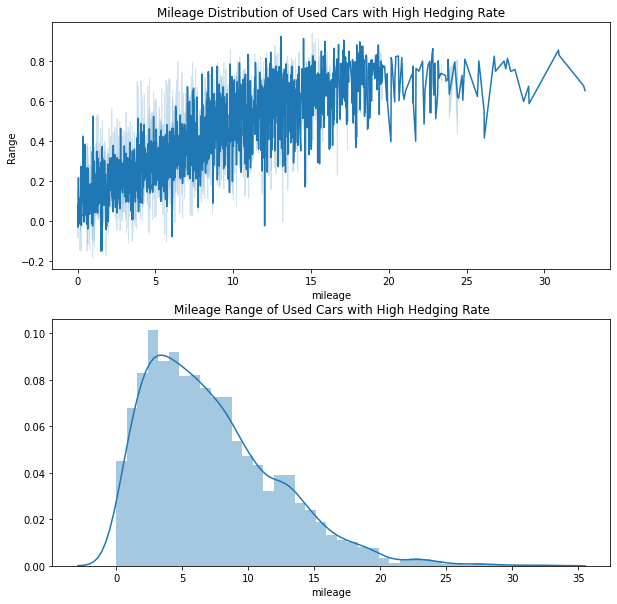

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Relationship between Used Car Maintenance Rate and Mileage')
plt.subplot(211)
sns.lineplot(data=valuePreservation, x='mileage', y='Range')
plt.title('Mileage Distribution of Used Cars with High Hedging Rate')
plt.subplot(212)
plt.title('Mileage Range of Used Cars with High Hedging Rate')
sns.distplot(valuePreservation['mileage'])
plt.savefig('./solve3/Relationship between Used Car Maintenance Rate and Mileage.png', dpi=1600)

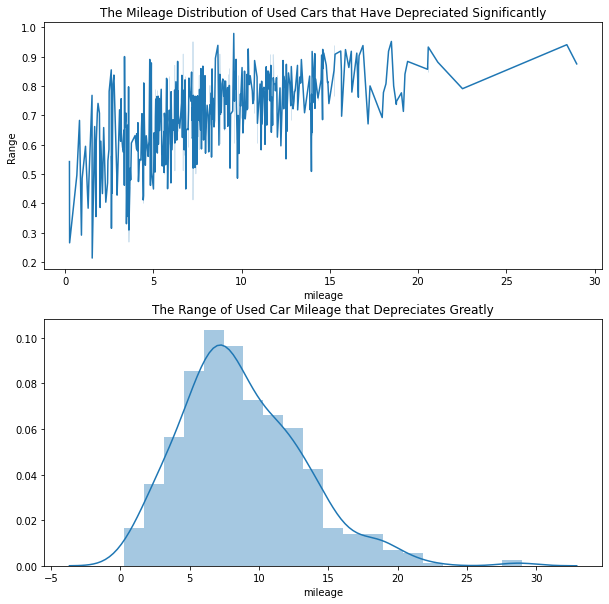

In [23]:
plt.figure(figsize=(10, 10))
plt.title('The Relationship Between the Depreciation of Used Cars and Mileage')
plt.subplot(211)
sns.lineplot(data=depreciation, x='mileage', y='Range')
plt.title('The Mileage Distribution of Used Cars that Have Depreciated Significantly')
plt.subplot(212)
plt.title('The Range of Used Car Mileage that Depreciates Greatly')
sns.distplot(depreciation['mileage'])
plt.savefig('./solve3/The Relationship Between the Depreciation of Used Cars and Mileage', dpi=1600)

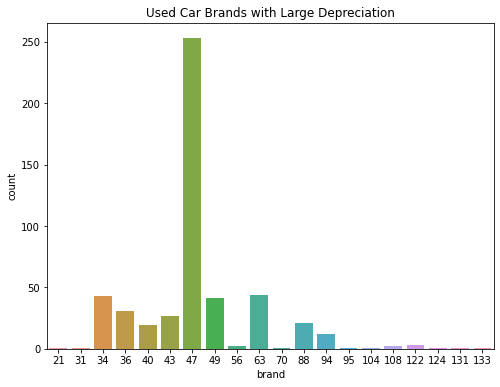

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(depreciation['brand'])
plt.title('Used Car Brands with Large Depreciation')
plt.savefig('./solve3/Used Car Brands with Large Depreciation.png', dpi=800)

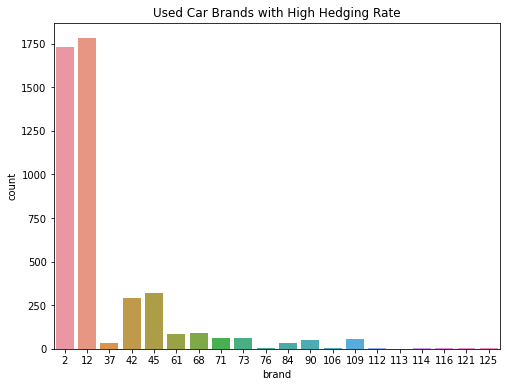

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(valuePreservation['brand'])
plt.title('Used Car Brands with High Hedging Rate')
plt.savefig('./solve3/Used Car Brands with High Hedging Rate.png', dpi=800)

In [26]:
appreciation = data[data['price'] > data['newPrice']]
appreciation

,serial,model,newPrice,useTime,productionTime,mileage,gearbox,country,cityId,price,brand,time,Range
64,107,144,184.00,0.054795,0.673973,0.71,13.0,779412.0,1,210.00,42,1.0,-0.141304
1200,31,1970,23.29,0.438356,0.619178,1.22,19.0,779416.0,18,23.58,5,1.0,-0.012452
1354,276,2137,59.18,1.967123,2.594521,1.28,29.0,779416.0,1,65.00,3,2.0,-0.098344
1492,179,2319,94.98,0.564384,1.013699,0.89,19.0,779412.0,1,98.00,20,1.0,-0.031796
1493,179,2319,94.98,0.684932,1.487671,0.56,19.0,779412.0,1,98.88,20,1.0,-0.041061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28556,396,12273,54.50,1.536986,1.958904,0.82,31.0,779412.0,6,56.00,42,3.0,-0.027523
28966,805,3238,34.00,0.909589,1.830137,1.85,3.0,779415.0,7,34.40,2,5.0,-0.011765
29266,836,8603,139.88,2.145205,2.498630,1.57,19.0,779412.0,1,149.00,20,3.0,-0.065199
29832,181,5309,45.99,0.605479,1.512329,2.13,13.0,779416.0,18,53.23,44,2.0,-0.157426


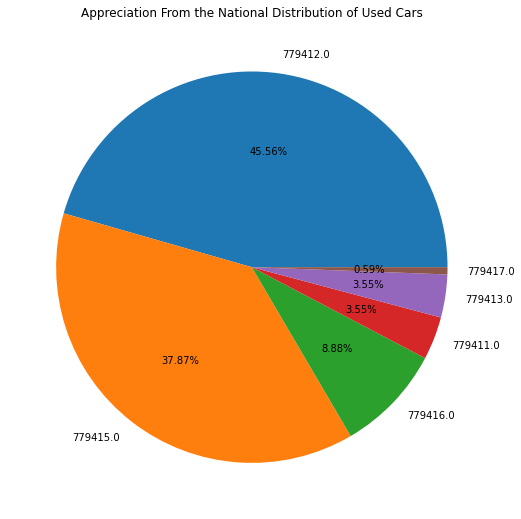

In [27]:
plt.figure(figsize=(16, 9))
vc = appreciation['country'].value_counts()
plt.pie(vc,labels=vc.index,autopct='%1.2f%%')
plt.title('Appreciation From the National Distribution of Used Cars')
plt.savefig('./solve3/Appreciation From the National Distribution of Used Cars.png', dpi=800)

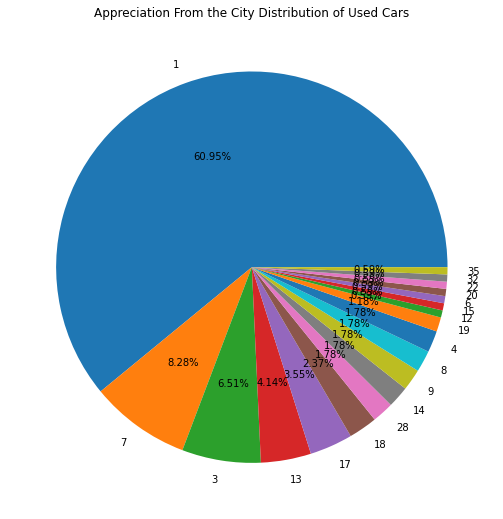

In [28]:
plt.figure(figsize=(16, 9))
vc = appreciation['cityId'].value_counts()
plt.pie(vc,labels=vc.index,autopct='%1.2f%%')
plt.title('Appreciation From the City Distribution of Used Cars')
plt.savefig('./solve3/Appreciation From the City Distribution of Used Cars.png', dpi=800)

In [29]:
city_brand = pd.concat([valuePreservation, depreciation], axis=0)
city_brand = city_brand[city_brand['cityId'] == 1]
city_brand

,serial,model,newPrice,useTime,productionTime,mileage,gearbox,country,cityId,price,brand,time,Range
6247,1099,8023,21.38,0.115068,0.172603,0.90,13.0,779413.0,1,24.20,125,0.0,-0.131899
6248,1099,8023,21.38,0.115068,0.230137,0.15,13.0,779413.0,1,26.80,125,0.0,-0.253508
14085,1099,8023,21.38,0.191781,0.575342,0.77,13.0,779413.0,1,26.80,125,0.0,-0.253508
6984,892,8972,32.80,0.243836,0.452055,0.81,27.0,779417.0,1,29.20,114,1.0,0.109756
6985,892,8972,32.80,0.224658,0.432877,0.78,27.0,779417.0,1,29.20,114,1.0,0.109756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18719,755,2797,9.29,2.424658,3.263014,3.62,3.0,779413.0,1,6.80,36,4.0,0.268030
18940,755,2797,9.29,2.452055,3.290411,3.62,3.0,779413.0,1,6.80,36,4.0,0.268030
21127,755,2797,9.29,2.498630,3.336986,3.62,3.0,779413.0,1,5.88,36,4.0,0.367061
22966,755,2797,9.29,2.380822,3.219178,3.62,3.0,779413.0,1,6.20,36,4.0,0.332616


In [30]:
city_preservation = valuePreservation[valuePreservation['cityId'] == 1]
city_depreciation = depreciation[depreciation['cityId'] ==1]
city_depreciation

,serial,model,newPrice,useTime,productionTime,mileage,gearbox,country,cityId,price,brand,time,Range
29787,69,6731,14.78,10.457534,10.594521,4.89,4.0,779413.0,1,1.80,31,12.0,0.878214
14636,998,5852,27.00,12.364384,12.797260,16.63,4.0,779412.0,1,3.58,94,14.0,0.867407
18100,525,1622,28.60,9.386301,9.643836,10.31,3.0,779412.0,1,5.50,94,10.0,0.807692
22243,525,1622,28.60,9.460274,9.717808,10.31,3.0,779412.0,1,4.50,94,10.0,0.842657
23438,525,6252,30.80,7.980822,8.287671,7.86,3.0,779412.0,1,6.28,94,9.0,0.796104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18719,755,2797,9.29,2.424658,3.263014,3.62,3.0,779413.0,1,6.80,36,4.0,0.268030
18940,755,2797,9.29,2.452055,3.290411,3.62,3.0,779413.0,1,6.80,36,4.0,0.268030
21127,755,2797,9.29,2.498630,3.336986,3.62,3.0,779413.0,1,5.88,36,4.0,0.367061
22966,755,2797,9.29,2.380822,3.219178,3.62,3.0,779413.0,1,6.20,36,4.0,0.332616


count    1712.000000
mean       34.304924
std        38.886147
min         4.490000
25%        16.980000
50%        23.980000
75%        33.985000
max       610.000000
Name: newPrice, dtype: float64

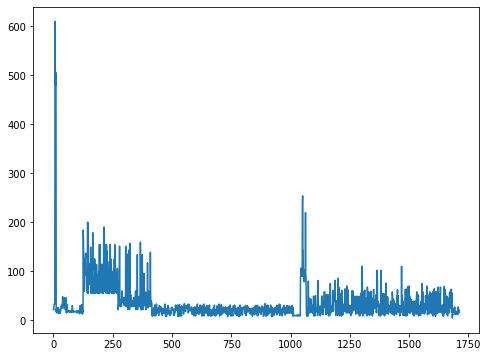

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(range(1712), city_preservation.newPrice)
city_preservation.newPrice.describe()

count    178.000000
mean      22.466292
std       33.074074
min        4.090000
25%       12.180000
50%       17.090000
75%       22.772500
max      368.800000
Name: newPrice, dtype: float64

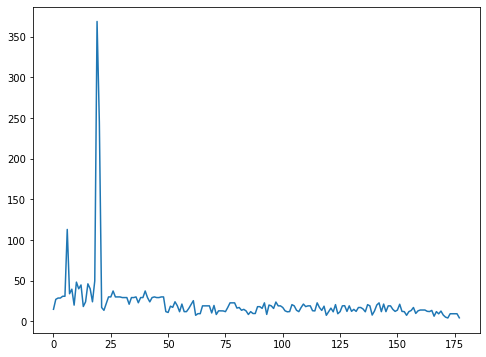

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(range(178), city_depreciation.newPrice)
city_depreciation.newPrice.describe()

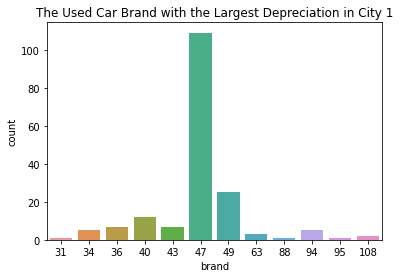

In [33]:
sns.countplot(city_depreciation['brand'])
plt.title('The Used Car Brand with the Largest Depreciation in City 1')
plt.savefig('./solve3/The Used Car Brand with the Largest Depreciation in City 1.png', dpi=800)

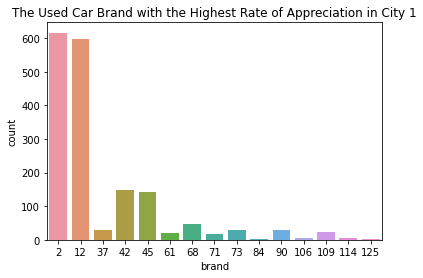

In [34]:
sns.countplot(city_preservation['brand'])
plt.title('The Used Car Brand with the Highest Rate of Appreciation in City 1')
plt.savefig('./solve3/The Used Car Brand with the Highest Rate of Appreciation in City 1.png', dpi=800)

In [35]:
city_preservation

,serial,model,newPrice,useTime,productionTime,mileage,gearbox,country,cityId,price,brand,time,Range
6247,1099,8023,21.38,0.115068,0.172603,0.90,13.0,779413.0,1,24.20,125,0.0,-0.131899
6248,1099,8023,21.38,0.115068,0.230137,0.15,13.0,779413.0,1,26.80,125,0.0,-0.253508
14085,1099,8023,21.38,0.191781,0.575342,0.77,13.0,779413.0,1,26.80,125,0.0,-0.253508
6984,892,8972,32.80,0.243836,0.452055,0.81,27.0,779417.0,1,29.20,114,1.0,0.109756
6985,892,8972,32.80,0.224658,0.432877,0.78,27.0,779417.0,1,29.20,114,1.0,0.109756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,1074,7469,26.98,1.093151,1.219178,2.90,13.0,779416.0,1,20.50,90,1.0,0.240178
25903,468,4009,15.98,1.917808,2.049315,1.48,9.0,779413.0,1,8.38,90,4.0,0.475594
26805,468,11417,14.58,1.945205,2.043836,1.26,9.0,779413.0,1,8.88,90,4.0,0.390947
27946,468,9957,21.18,1.320548,1.553425,1.12,9.0,779413.0,1,10.50,90,4.0,0.504249


In [36]:
city_preservation[city_preservation['brand'] ==2]['Range'].mean(), city_preservation[city_preservation['brand'] ==12]['Range'].mean()

(0.3501851452883874, 0.3641426275419702)

In [37]:
city_depreciation[city_depreciation['brand']==47]['Range'].mean(), city_depreciation[city_depreciation['brand']==49]['Range'].mean()

(0.6836916525184396, 0.7208584417028563)

In [38]:
city_preservation[city_preservation['Range'] < 0]

,serial,model,newPrice,useTime,productionTime,mileage,gearbox,country,cityId,price,brand,time,Range
6247,1099,8023,21.38,0.115068,0.172603,0.90,13.0,779413.0,1,24.20,125,0.0,-0.131899
6248,1099,8023,21.38,0.115068,0.230137,0.15,13.0,779413.0,1,26.80,125,0.0,-0.253508
14085,1099,8023,21.38,0.191781,0.575342,0.77,13.0,779413.0,1,26.80,125,0.0,-0.253508
3104,899,4350,610.00,0.230137,0.506849,0.01,14.0,779411.0,1,678.80,106,3.0,-0.112787
26769,1014,6178,505.00,0.224658,1.095890,0.13,13.0,779411.0,1,528.80,106,3.0,-0.047129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,161,210,49.98,1.032877,1.172603,1.83,3.0,779415.0,1,58.50,2,3.0,-0.170468
24228,974,8323,48.00,1.076712,2.331507,0.66,3.0,779415.0,1,59.80,2,6.0,-0.245833
26202,114,140,49.00,1.690411,2.969863,2.46,3.0,779415.0,1,53.80,2,7.0,-0.097959
28421,437,1179,49.00,2.172603,2.898630,3.16,21.0,779415.0,1,59.50,2,6.0,-0.214286


In [39]:
train = data[['brand', 'serial', 'model', 'mileage', 'country', 'time', 'Range', 'cityId']]
train_group = train.groupby('country')
train = pd.concat([train_group.get_group(779412), train_group.get_group(779413),
                   train_group.get_group(779414), train_group.get_group(779415),
                   train_group.get_group(779416)], axis=0)
target = train['Range']
train.drop('Range', axis=1, inplace=True)
train

,brand,serial,model,mileage,country,time,cityId
8,8,14,14,16.27,779412.0,15.0,1
10,8,8,20,4.09,779412.0,4.0,2
24,18,45,49,9.29,779412.0,6.0,3
25,8,16,50,12.43,779412.0,9.0,3
36,11,63,74,12.20,779412.0,10.0,1
...,...,...,...,...,...,...,...
29945,3,137,11539,11.82,779416.0,14.0,4
29948,3,137,8058,6.85,779416.0,8.0,4
29952,66,932,12579,1.01,779416.0,1.0,7
29957,5,73,599,4.54,779416.0,4.0,19


In [40]:
from category_encoders import JamesSteinEncoder

je = JamesSteinEncoder(cols=['brand', 'serial', 'model'])
train[['brand', 'serial', 'model']] = je.fit_transform(
    train[['brand', 'serial', 'model']], target
)
train = pd.get_dummies(data=train, columns=['country'])
train

,brand,serial,model,mileage,time,cityId,country_779412.0,country_779413.0,country_779414.0,country_779415.0,country_779416.0
8,0.493922,0.512875,0.831666,16.27,15.0,1,1,0,0,0,0
10,0.493922,0.490359,0.358622,4.09,4.0,2,1,0,0,0,0
24,0.503898,0.469002,0.467927,9.29,6.0,3,1,0,0,0,0
25,0.493922,0.514326,0.725426,12.43,9.0,3,1,0,0,0,0
36,0.497524,0.489356,0.746356,12.20,10.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29945,0.536332,0.596459,0.843708,11.82,14.0,4,0,0,0,0,1
29948,0.536332,0.596459,0.637522,6.85,8.0,4,0,0,0,0,1
29952,0.478311,0.230835,0.130825,1.01,1.0,7,0,0,0,0,1
29957,0.516711,0.481653,0.455468,4.54,4.0,19,0,0,0,0,1


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('cityId', axis=1), target, test_size=.3, random_state=42)

In [42]:
from keras import regularizers
from keras.layers import Dense, BatchNormalization
from keras.models import Model, Input

input_layer = Input(shape=(10, ))
batch = BatchNormalization()(input_layer)
encoder = (Dense(6, activation='relu', activity_regularizer=regularizers.l2(10e-5)))(batch)
encoder = Dense(6, activation='relu')(encoder)
batch_ = BatchNormalization()(encoder)
decoder = (Dense(10, activation='relu'))(batch_)

auto_encode = Model(inputs=input_layer, outputs=decoder)

In [43]:
auto_encode.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = auto_encode.fit(X_train, X_train, epochs=15, validation_data=(X_test, X_test))

Epoch 1/15
590/590 [==============================] - 13s 3ms/step - loss: 9.0706 - mae: 1.4049 - val_loss: 1.1587 - val_mae: 0.5258
Epoch 2/15
590/590 [==============================] - 1s 2ms/step - loss: 1.0236 - mae: 0.4794 - val_loss: 0.2831 - val_mae: 0.2678
Epoch 3/15
590/590 [==============================] - 1s 2ms/step - loss: 0.3751 - mae: 0.3032 - val_loss: 0.1317 - val_mae: 0.1786
Epoch 4/15
590/590 [==============================] - 1s 2ms/step - loss: 0.3117 - mae: 0.2635 - val_loss: 0.1463 - val_mae: 0.1983
Epoch 5/15
590/590 [==============================] - 1s 2ms/step - loss: 0.2541 - mae: 0.2342 - val_loss: 0.0763 - val_mae: 0.1380
Epoch 6/15
590/590 [==============================] - 1s 2ms/step - loss: 0.2221 - mae: 0.2222 - val_loss: 0.0627 - val_mae: 0.1150
Epoch 7/15
590/590 [==============================] - 1s 2ms/step - loss: 0.2355 - mae: 0.2142 - val_loss: 0.0573 - val_mae: 0.1031
Epoch 8/15
590/590 [==============================] - 1s 2ms/step - loss: 0

In [44]:
history = history.history

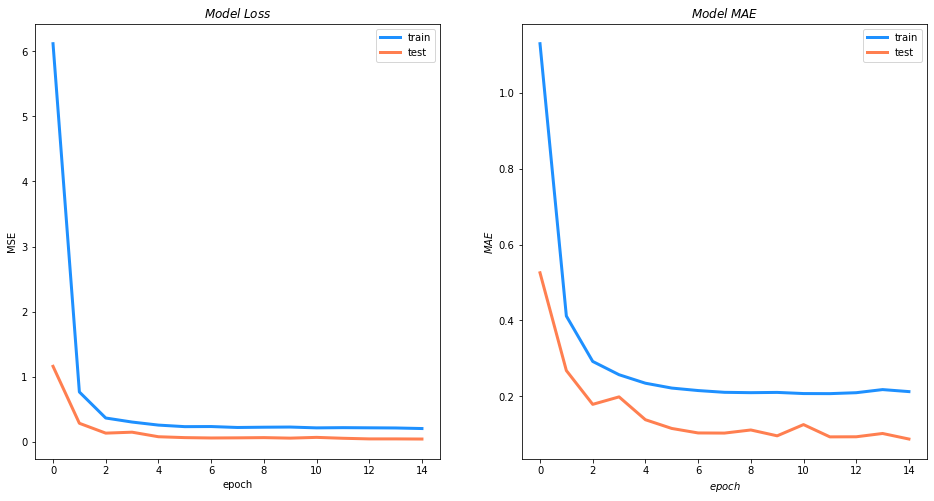

In [45]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.plot(history['loss'], c='dodgerblue', lw=3)
plt.plot(history['val_loss'], c='coral', lw=3)
plt.title('$Model \; Loss$')
plt.ylabel('MSE'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(122)
plt.plot(history['mae'], c='dodgerblue', lw=3)
plt.plot(history['val_mae'], c='coral', lw=3)
plt.title('$Model \; MAE$')
plt.ylabel('$MAE$'); plt.xlabel('$epoch$')
plt.legend(['train', 'test'], loc='upper right')

plt.savefig('./solve3/Training loss of self encoder.png', dpi=800)

In [46]:
predict_test = auto_encode.predict(X_test)
predict_train = auto_encode.predict(X_train)

mse_test = np.mean(np.power(X_test - predict_test, 2), axis=1)
mse_fraud = np.mean(np.power(X_train - predict_train, 2), axis=1)
mae_test = np.mean(np.abs(X_test - predict_test), axis=1)
mae_fraud = np.mean(np.abs(X_train - predict_train), axis=1)
mse_df = pd.DataFrame()
mse_df['MSE'] = np.hstack([mse_test, mse_fraud])
mse_df['MAE'] = np.hstack([mae_test, mae_fraud])
mse_df = mse_df.sample(frac=1).reset_index(drop=True)
mse_df

,MSE,MAE
0,0.034187,0.097153
1,0.106488,0.144007
2,0.059584,0.124936
3,0.054715,0.120460
4,0.060377,0.176335
...,...,...
26931,0.053437,0.110827
26932,0.004170,0.035047
26933,0.031402,0.116629
26934,0.002682,0.032965


In [47]:
mse_df.describe()

,MSE,MAE
count,26936.000000,26936.000000
mean,0.040300,0.087465
std,0.060849,0.055359
min,0.000488,0.012129
25%,0.002515,0.032422
50%,0.028632,0.091458
75%,0.056745,0.123396
max,5.551106,1.229774


<AxesSubplot:title={'center':'Distribution of Mean Absolute Error of Reconstructed Data Set'}, xlabel='MAE'>

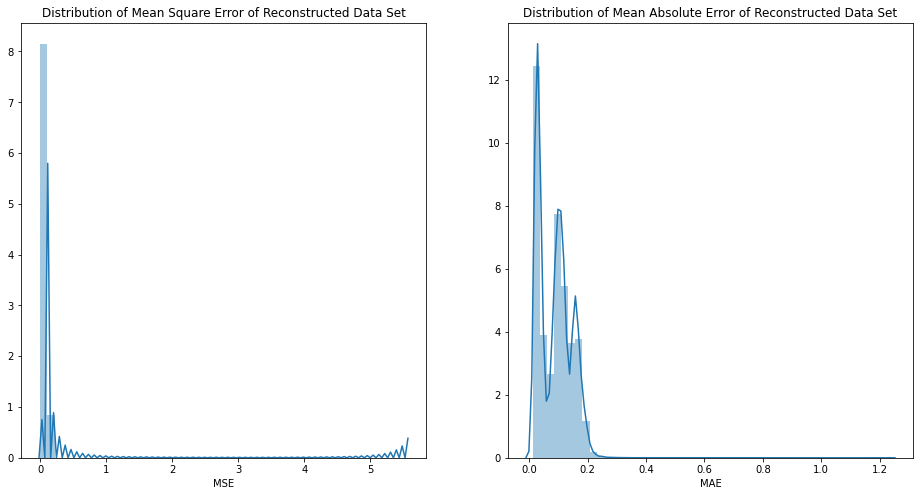

In [48]:
fig, ax1 = plt.subplots(figsize = (16, 8))

plt.subplot(121)
sns.distplot(mse_df['MSE'])
plt.title('Distribution of Mean Square Error of Reconstructed Data Set')
plt.subplot(122)
plt.title('Distribution of Mean Absolute Error of Reconstructed Data Set')
sns.distplot(mse_df['MAE'])

In [49]:
input_layer2 = Input(shape=(10, ))
dense = Dense(8, activation='relu')(input_layer2)
result = Dense(1)(dense)

In [50]:
nature = Model(inputs=input_layer2, outputs=result)
nature.compile(optimizer='adam', loss='mse', metrics=['mae'])
his = nature.fit(predict_train, y_train, epochs=15, validation_split=.3)

Epoch 1/15
413/413 [==============================] - 1s 2ms/step - loss: 6.2650 - mae: 1.7980 - val_loss: 0.0991 - val_mae: 0.2484
Epoch 2/15
413/413 [==============================] - 1s 1ms/step - loss: 0.0859 - mae: 0.2297 - val_loss: 0.0485 - val_mae: 0.1728
Epoch 3/15
413/413 [==============================] - 1s 1ms/step - loss: 0.0415 - mae: 0.1599 - val_loss: 0.0274 - val_mae: 0.1303
Epoch 4/15
413/413 [==============================] - 1s 1ms/step - loss: 0.0247 - mae: 0.1226 - val_loss: 0.0183 - val_mae: 0.1057
Epoch 5/15
413/413 [==============================] - 1s 1ms/step - loss: 0.0176 - mae: 0.1016 - val_loss: 0.0147 - val_mae: 0.0932
Epoch 6/15
413/413 [==============================] - 1s 2ms/step - loss: 0.0144 - mae: 0.0911 - val_loss: 0.0134 - val_mae: 0.0883
Epoch 7/15
413/413 [==============================] - 1s 1ms/step - loss: 0.0134 - mae: 0.0885 - val_loss: 0.0128 - val_mae: 0.0877
Epoch 8/15
413/413 [==============================] - 1s 2ms/step - loss: 0.

In [51]:
nature.evaluate(predict_test, y_test)

253/253 [==============================] - 0s 881us/step - loss: 0.0116 - mae: 0.0820


[0.011644182726740837, 0.08200998604297638]

In [52]:
his = his.history

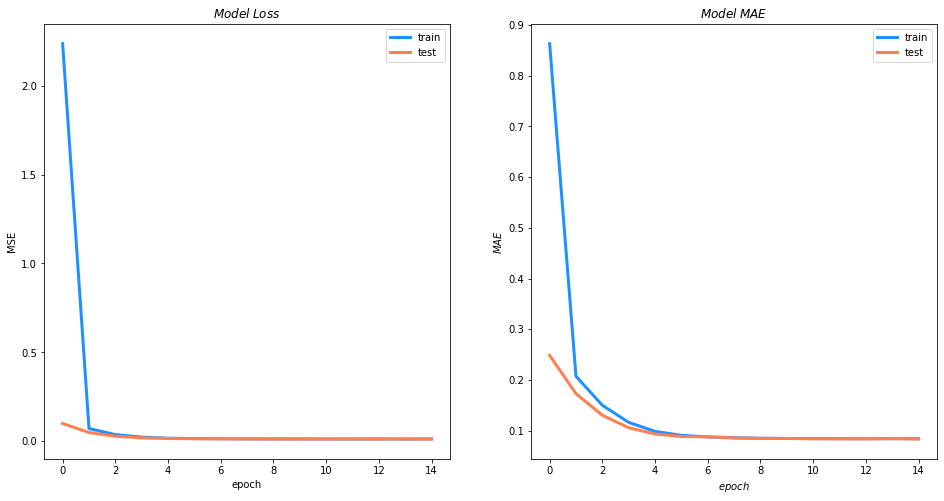

In [53]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.plot(his['loss'], c='dodgerblue', lw=3)
plt.plot(his['val_loss'], c='coral', lw=3)
plt.title('$Model \; Loss$')
plt.ylabel('MSE'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(122)
plt.plot(his['mae'], c='dodgerblue', lw=3)
plt.plot(his['val_mae'], c='coral', lw=3)
plt.title('$Model \; MAE$')
plt.ylabel('$MAE$'); plt.xlabel('$epoch$')
plt.legend(['train', 'test'], loc='upper right')

In [54]:
data_temp = pd.read_csv('./result.csv')
data_temp

,Unnamed: 0,carId,tradeTime,brand,serial,model,mileage,color,cityId,carCode,...,unknown7,unknown8,unknown9,unknown10,unknown12,unknown13,price,unknown11_1,unknown11_2,unknown11_3
0,0,1,2021-06-28,1,1,1,4.01,1,1,1.0,...,1.0,5.0,2.0,5.964053,3.824658,1,4.24,4.220,1.740,1.625
1,1,2,2021-06-25,2,2,2,8.60,1,2,1.0,...,2.0,4.0,3.0,19.289185,4.816438,2,7.38,4.630,1.775,1.480
2,2,5,2021-06-19,5,5,5,15.56,1,2,3.0,...,1.0,4.0,3.0,5.964053,14.254795,2,1.00,4.515,1.725,1.445
3,3,6,2021-06-29,6,6,6,6.04,1,3,1.0,...,2.0,5.0,2.0,5.964053,4.912329,2,4.38,4.500,1.834,1.707
4,4,7,2021-06-30,7,7,7,5.70,4,1,2.0,...,1.0,5.0,2.0,5.964053,9.252055,1,5.90,4.315,1.783,1.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29961,29995,18531,2021-05-26,34,588,4169,10.38,5,35,3.0,...,1.0,5.0,2.0,5.964053,11.501370,1,0.88,4.295,1.705,1.570
29962,29996,4294,2020-06-03,12,92,1797,11.69,2,1,2.0,...,1.0,4.0,3.0,19.289185,8.427397,2,8.30,4.960,1.845,1.480
29963,29997,20584,2020-09-27,7,113,501,9.87,6,1,2.0,...,1.0,4.0,3.0,5.964053,11.498630,2,5.00,4.665,1.700,1.510
29964,29998,11490,2020-11-09,45,131,3024,9.57,1,1,1.0,...,1.0,4.0,3.0,32.925907,5.279452,1,28.00,4.915,1.820,1.450


In [55]:
temp = data_temp[['tradeTime', 'newPrice', 'price']]
temp.index = pd.DatetimeIndex(temp['tradeTime'])
temp.drop(['tradeTime'], axis=1, inplace=True)
temp = temp.resample('D').sum()
temp

,newPrice,price
tradeTime,,
2020-01-01,135.20,81.2300
2020-01-02,253.83,171.6300
2020-01-03,172.62,73.3400
2020-01-04,88.51,48.5400
2020-01-05,381.15,238.3400
...,...,...
2021-07-27,1843.20,833.3985
2021-07-28,1592.98,725.4100
2021-07-29,1856.93,968.9400


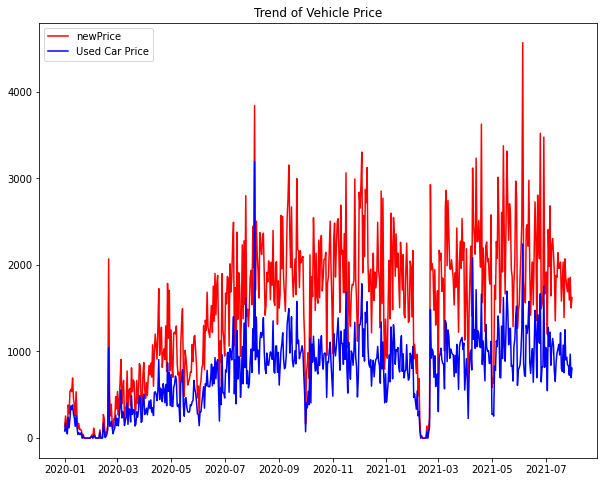

In [56]:
plt.figure(figsize=(10, 8))
plt.plot(temp['newPrice'], 'r')
plt.plot(temp['price'], 'b')
plt.legend(['newPrice', 'Used Car Price'])
plt.title('Trend of Vehicle Price')
plt.savefig('./solve3/Trend of Vehicle Price.png', dpi=800)

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
temp[['newPrice', 'price']] = scaler.fit_transform(temp)

newPrice_train, newPrice_test = temp['newPrice'][:400], temp['newPrice'][400:]
price_train, price_test = temp['price'][:400], temp['price'][400:]

In [58]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

look_back=3

train_new, train_new_target  = create_dataset(newPrice_train,look_back)
test_new, test_new_target = create_dataset(newPrice_test,look_back)

train_price, train_price_target  = create_dataset(price_train,look_back)
test_price, test_price_target = create_dataset(price_test,look_back)

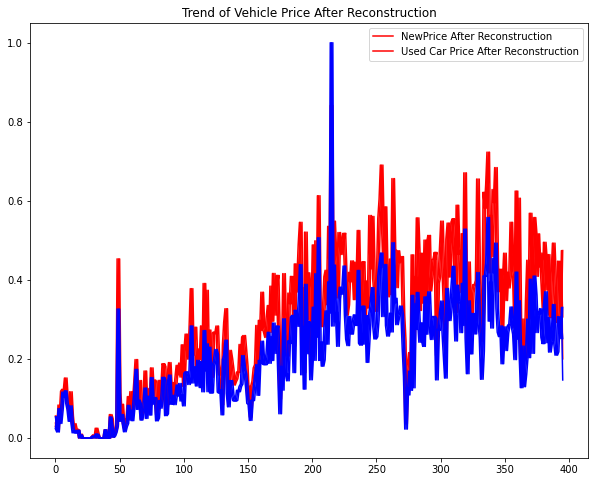

In [59]:
plt.figure(figsize=(10, 8))
plt.plot(train_new, 'r')
plt.plot(train_price, 'b')
plt.legend(['NewPrice After Reconstruction', 'Used Car Price After Reconstruction'])
plt.title('Trend of Vehicle Price After Reconstruction')
plt.savefig('./solve3/Trend of Vehicle Price After Reconstruction.png', dpi=800)

In [88]:
from keras.layers import LSTM, Conv1D, AveragePooling1D, Flatten, Bidirectional
from keras.models import Sequential

lstm = Sequential()
lstm.add(LSTM(4, input_shape=(3, 1), return_sequences=True, activation='tanh'))
lstm.add(Conv1D(8, 3, strides=1, activation='tanh', padding='same', ))
lstm.add(AveragePooling1D(3))
lstm.add(Bidirectional(LSTM(8, activation='tanh')))
lstm.add(Flatten())
lstm.add(Dense(1))

In [97]:
from keras.callbacks import TensorBoard

lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])
his = lstm.fit(train_price.reshape(-1, 3, 1), train_price_target, epochs=10, callbacks=[TensorBoard(log_dir='./log')])

Epoch 1/10
13/13 [==============================] - 5s 28ms/step - loss: 0.0084 - mae: 0.0641
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0077 - mae: 0.0633
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0079 - mae: 0.0618
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0613
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0068 - mae: 0.0620
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0064 - mae: 0.0585
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0074 - mae: 0.0629
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0092 - mae: 0.0629
Epoch 9/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0070 - mae: 0.0593
Epoch 10/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0073 - mae: 0.0619


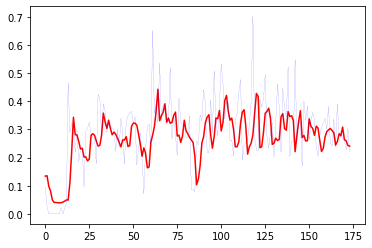

In [92]:
price_predict = lstm.predict(test_price.reshape(-1, 3, 1))
plt.plot(price_predict, 'r')
plt.plot(test_price_target, 'b', lw=.1)

In [94]:
_ = np.zeros_like(price_predict)
price_predict = np.hstack([_, price_predict])
price_predict = scaler.inverse_transform(price_predict)[:, 1]
price_predict

array([ 428.33597,  432.4715 ,  311.63885,  258.94418,  158.29288,
        129.8017 ,  131.01717,  126.06099,  126.06099,  126.06099,
        133.96367,  144.64442,  158.10666,  157.08742,  355.32074,
        704.7415 , 1095.3761 ,  898.19745,  894.13824,  823.44604,
        735.8765 ,  744.4777 ,  644.75446,  646.7806 ,  600.5971 ,
        620.62463,  891.0937 ,  908.78186,  891.2901 ,  824.5926 ,
        768.65485,  776.8155 ,  891.6658 , 1142.2928 , 1041.3192 ,
        968.9967 , 1062.349  ,  969.59796,  897.31055,  926.5846 ,
        903.9979 ,  860.7484 ,  811.91486,  760.2532 ,  839.0364 ,
        837.09863,  875.64655,  763.28406,  773.6958 ,  991.1526 ,
       1027.9813 , 1028.5996 , 1005.7225 ,  904.3977 ,  792.4467 ,
        653.68604,  748.61   ,  688.24976,  521.7413 ,  532.0094 ,
        810.8849 ,  892.06946,  988.6738 , 1165.1171 , 1412.9131 ,
       1055.8667 , 1114.3477 , 1151.1465 , 1248.0302 , 1039.1898 ,
       1086.1198 , 1027.7145 , 1036.4802 , 1115.7855 , 1153.67

In [64]:
encode = scaler.inverse_transform(temp)
encode = pd.DataFrame(encode)
encode

,0,1
0,135.20,81.2300
1,253.83,171.6300
2,172.62,73.3400
3,88.51,48.5400
4,381.15,238.3400
...,...,...
573,1843.20,833.3985
574,1592.98,725.4100
575,1856.93,968.9400
576,1501.64,698.3800


In [65]:
encode.index = temp.index

In [66]:
lstm.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
his2 = lstm.fit(train_new.reshape(-1, 3, 1), train_new_target, epochs=10)

Epoch 1/10
13/13 [==============================] - 5s 8ms/step - loss: 0.0206 - mae: 0.1156
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0166 - mae: 0.1077
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.0161 - mae: 0.1040
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0154 - mae: 0.0998
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0123 - mae: 0.0889
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0124 - mae: 0.0884
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0104 - mae: 0.0810
Epoch 8/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0131 - mae: 0.0900
Epoch 9/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0112 - mae: 0.0821
Epoch 10/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0105 - mae: 0.0807


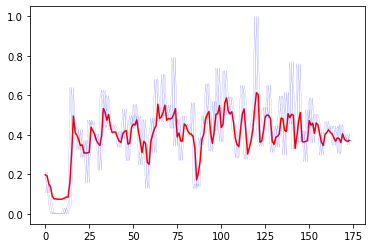

In [67]:
new_predict = lstm.predict(test_new.reshape(-1, 3, 1))
plt.plot(new_predict, 'r')
plt.plot(test_new, 'b', lw=.1)

In [68]:
new_predict = np.hstack([new_predict, _])
new_predict = scaler.inverse_transform(new_predict)[:, 0]
new_predict

array([ 903.65125,  878.08514,  697.4878 ,  622.2418 ,  406.15717,
        344.63733,  347.20172,  338.91693,  338.91693,  338.91693,
        349.99728,  367.8906 ,  392.5088 ,  388.67514,  746.3684 ,
       1420.1201 , 2260.67   , 1875.8037 , 1817.2822 , 1706.6036 ,
       1579.3401 , 1593.9626 , 1406.561  , 1407.1309 , 1409.9442 ,
       1423.0569 , 2006.9034 , 1925.3245 , 1846.1991 , 1698.1167 ,
       1630.6401 , 1581.9249 , 1799.0409 , 2434.5457 , 2344.8606 ,
       2164.0186 , 2298.0403 , 2019.9259 , 1879.61   , 1894.207  ,
       1890.8615 , 1770.6677 , 1680.8173 , 1651.8638 , 1843.4435 ,
       1904.3768 , 1926.9005 , 1612.8489 , 1629.0367 , 1997.4745 ,
       2074.523  , 2054.3494 , 2172.085  , 1886.7953 , 1675.3713 ,
       1415.2153 , 1675.742  , 1628.3112 , 1193.2266 , 1145.138  ,
       1670.3011 , 1839.1545 , 1954.8707 , 2044.5798 , 2534.0388 ,
       2208.4885 , 2236.339  , 2351.6978 , 2512.3613 , 2163.3708 ,
       2203.6045 , 2190.9302 , 2214.2136 , 2301.9775 , 2431.52

In [95]:
predict = np.vstack([price_predict, new_predict]).T
predict = pd.DataFrame(predict)
predict.index = temp.index[-174: ]
predict

,0,1
tradeTime,,
2021-02-08,428.335968,903.651245
2021-02-09,432.471497,878.085144
2021-02-10,311.638855,697.487793
2021-02-11,258.944183,622.241821
2021-02-12,158.292877,406.157166
...,...,...
2021-07-27,984.175110,1852.924072
2021-07-28,843.055603,1725.006958
2021-07-29,827.689392,1687.773926


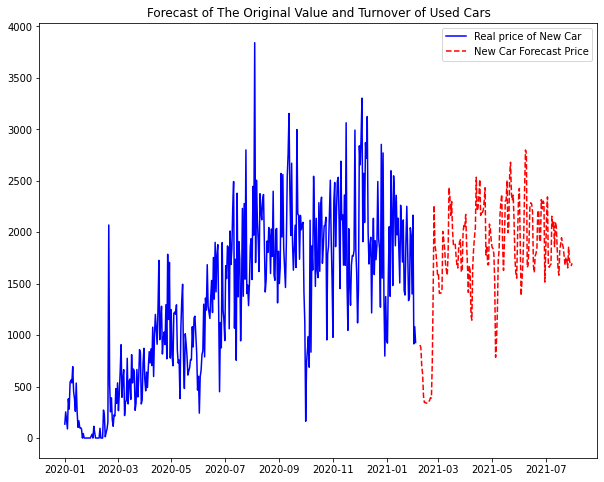

In [70]:
plt.figure(figsize=(10, 8))
plt.plot(encode[0][: 400], 'b-')
plt.plot(predict[1], 'r--')
plt.legend(['Real price of New Car', 'New Car Forecast Price'])
plt.title('Forecast of The Original Value and Turnover of Used Cars')
plt.savefig('./solve3/Forecast of The Original Value and Turnover of Used Cars', dpi=800)

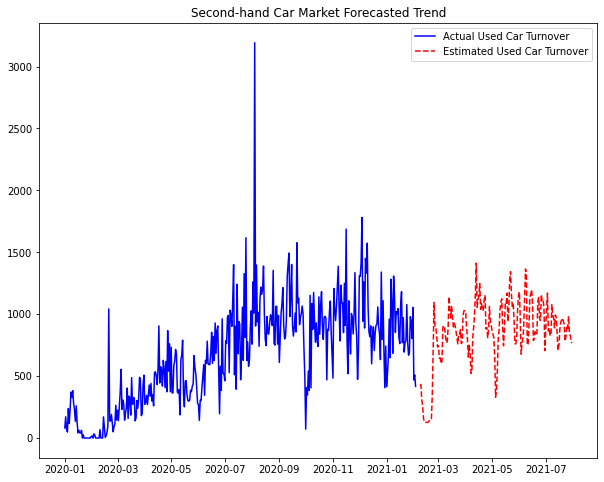

In [96]:
plt.figure(figsize=(10, 8))
plt.plot(encode[1][: 400], 'b-')
plt.plot(predict[0], 'r--')
plt.legend(['Actual Used Car Turnover', 'Estimated Used Car Turnover'])
plt.title('Second-hand Car Market Forecasted Trend')
plt.savefig('./solve3/Second-hand Car Market Forecasted Trend', dpi=800)

In [72]:
city1 = data_temp[data_temp['cityId'] == 1]
city1 = city1[['brand', 'serial', 'model', 'mileage', 'country', 'time', 'price', 'tradeTime', 'newPrice']]
city1

,brand,serial,model,mileage,country,time,price,tradeTime,newPrice
0,1,1,1,4.01,779413.0,4.0,4.24,2021-06-28,6.88
4,7,7,7,5.70,779415.0,9.0,5.90,2021-06-30,18.08
8,8,14,14,16.27,779412.0,15.0,1.18,2021-07-30,16.98
11,12,21,22,4.65,779415.0,5.0,6.50,2021-06-12,8.58
19,5,31,34,6.68,779416.0,7.0,10.65,2021-06-08,20.90
...,...,...,...,...,...,...,...,...,...
29959,23,77,12481,6.87,779419.0,8.0,10.40,2021-02-04,24.98
29960,44,249,403,5.79,779416.0,5.0,11.80,2021-04-19,25.98
29962,12,92,1797,11.69,779415.0,9.0,8.30,2020-06-03,20.28
29963,7,113,501,9.87,779415.0,12.0,5.00,2020-09-27,14.58


In [73]:
city1.index = pd.DatetimeIndex(city1.tradeTime)
city1 = city1.drop('tradeTime', axis=1)
city1

,brand,serial,model,mileage,country,time,price,newPrice
tradeTime,,,,,,,,
2021-06-28,1,1,1,4.01,779413.0,4.0,4.24,6.88
2021-06-30,7,7,7,5.70,779415.0,9.0,5.90,18.08
2021-07-30,8,14,14,16.27,779412.0,15.0,1.18,16.98
2021-06-12,12,21,22,4.65,779415.0,5.0,6.50,8.58
2021-06-08,5,31,34,6.68,779416.0,7.0,10.65,20.90
...,...,...,...,...,...,...,...,...
2021-02-04,23,77,12481,6.87,779419.0,8.0,10.40,24.98
2021-04-19,44,249,403,5.79,779416.0,5.0,11.80,25.98
2020-06-03,12,92,1797,11.69,779415.0,9.0,8.30,20.28


In [74]:
city1[['brand', 'serial', 'model']] = je.transform(city1[['brand', 'serial', 'model']])

city1 = pd.get_dummies(data=city1, columns=['country'])
city1

,brand,serial,model,mileage,time,price,newPrice,country_779411.0,country_779412.0,country_779413.0,country_779414.0,country_779415.0,country_779416.0,country_779417.0,country_779418.0,country_779419.0,country_779421.0
tradeTime,,,,,,,,,,,,,,,,,
2021-06-28,0.438879,0.360709,0.335112,4.01,4.0,4.24,6.88,0,0,1,0,0,0,0,0,0,0
2021-06-30,0.479626,0.499997,0.610567,5.70,9.0,5.90,18.08,0,0,0,0,1,0,0,0,0,0
2021-07-30,0.493922,0.512875,0.831666,16.27,15.0,1.18,16.98,0,1,0,0,0,0,0,0,0,0
2021-06-12,0.433966,0.422366,0.215995,4.65,5.0,6.50,8.58,0,0,0,0,1,0,0,0,0,0
2021-06-08,0.516711,0.455424,0.535947,6.68,7.0,10.65,20.90,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-04,0.291291,0.490006,0.490006,6.87,8.0,10.40,24.98,0,0,0,0,0,0,0,0,1,0
2021-04-19,0.489506,0.476307,0.534373,5.79,5.0,11.80,25.98,0,0,0,0,0,1,0,0,0,0
2020-06-03,0.433966,0.438562,0.578382,11.69,9.0,8.30,20.28,0,0,0,0,1,0,0,0,0,0


In [75]:
city1.drop(['country_779411.0', 'country_779417.0', 'country_779418.0', 'country_779419.0', 'country_779421.0'], axis=1, inplace=True)
city1

,brand,serial,model,mileage,time,price,newPrice,country_779412.0,country_779413.0,country_779414.0,country_779415.0,country_779416.0
tradeTime,,,,,,,,,,,,
2021-06-28,0.438879,0.360709,0.335112,4.01,4.0,4.24,6.88,0,1,0,0,0
2021-06-30,0.479626,0.499997,0.610567,5.70,9.0,5.90,18.08,0,0,0,1,0
2021-07-30,0.493922,0.512875,0.831666,16.27,15.0,1.18,16.98,1,0,0,0,0
2021-06-12,0.433966,0.422366,0.215995,4.65,5.0,6.50,8.58,0,0,0,1,0
2021-06-08,0.516711,0.455424,0.535947,6.68,7.0,10.65,20.90,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-04,0.291291,0.490006,0.490006,6.87,8.0,10.40,24.98,0,0,0,0,0
2021-04-19,0.489506,0.476307,0.534373,5.79,5.0,11.80,25.98,0,0,0,0,1
2020-06-03,0.433966,0.438562,0.578382,11.69,9.0,8.30,20.28,0,0,0,1,0


In [76]:
city1 = city1.resample('D').mean()
city1.dropna(axis=0, inplace=True)
city1

,brand,serial,model,mileage,time,price,newPrice,country_779412.0,country_779413.0,country_779414.0,country_779415.0,country_779416.0
tradeTime,,,,,,,,,,,,
2020-01-01,0.535968,0.537451,0.478359,4.060000,6.000000,10.950000,21.245000,1.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.493922,0.567325,0.457662,13.070000,5.000000,11.600000,21.180000,1.000000,0.000000,0.000000,0.000000,0.000000
2020-01-05,0.497524,0.508809,0.743834,12.110000,10.000000,12.000000,41.520000,1.000000,0.000000,0.000000,0.000000,0.000000
2020-01-06,0.536332,0.554452,0.444826,3.200000,4.000000,5.600000,11.430000,0.000000,0.000000,0.000000,0.000000,1.000000
2020-01-07,0.488588,0.497492,0.535510,7.110000,7.833333,13.900000,33.575000,0.833333,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-27,0.481269,0.489099,0.507054,8.330513,6.666667,15.506667,34.155897,0.487179,0.025641,0.025641,0.205128,0.128205
2021-07-28,0.475931,0.505438,0.515008,8.388387,7.258065,15.004839,32.298065,0.290323,0.096774,0.000000,0.193548,0.225806
2021-07-29,0.488401,0.478032,0.450298,7.395862,7.068966,23.291724,43.231724,0.517241,0.034483,0.034483,0.206897,0.137931


In [77]:
city1['Range'] = (city1['newPrice'] - city1['price']) / city1['newPrice']
city1.drop(['price', 'newPrice'], axis=1, inplace=True)
city1

,brand,serial,model,mileage,time,country_779412.0,country_779413.0,country_779414.0,country_779415.0,country_779416.0,Range
tradeTime,,,,,,,,,,,
2020-01-01,0.535968,0.537451,0.478359,4.060000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.484585
2020-01-03,0.493922,0.567325,0.457662,13.070000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.452314
2020-01-05,0.497524,0.508809,0.743834,12.110000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.710983
2020-01-06,0.536332,0.554452,0.444826,3.200000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.510061
2020-01-07,0.488588,0.497492,0.535510,7.110000,7.833333,0.833333,0.000000,0.000000,0.000000,0.000000,0.586001
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-27,0.481269,0.489099,0.507054,8.330513,6.666667,0.487179,0.025641,0.025641,0.205128,0.128205,0.546003
2021-07-28,0.475931,0.505438,0.515008,8.388387,7.258065,0.290323,0.096774,0.000000,0.193548,0.225806,0.535426
2021-07-29,0.488401,0.478032,0.450298,7.395862,7.068966,0.517241,0.034483,0.034483,0.206897,0.137931,0.461235


In [78]:
city_clear = auto_encode.predict(city1.drop('Range', axis=1))
city_predict = nature.predict(city_clear)
city_predict

array([[0.44099364],
       [0.47207627],
       [0.7069785 ],
       [0.30964372],
       [0.55369574],
       [0.44435975],
       [0.55781347],
       [0.45957813],
       [0.41835365],
       [0.45222315],
       [0.62256247],
       [0.54299766],
       [0.6675485 ],
       [0.6221729 ],
       [0.6926004 ],
       [0.58380264],
       [0.33823368],
       [0.3599806 ],
       [0.5738633 ],
       [0.42081305],
       [0.54423064],
       [0.26934192],
       [0.34590682],
       [0.5574246 ],
       [0.43891886],
       [0.504253  ],
       [0.5076898 ],
       [0.5602297 ],
       [0.5686576 ],
       [0.675782  ],
       [0.5907249 ],
       [0.5431672 ],
       [0.5664523 ],
       [0.43186292],
       [0.42369232],
       [0.36873916],
       [0.44004628],
       [0.44666538],
       [0.5649808 ],
       [0.38815853],
       [0.35111496],
       [0.5642298 ],
       [0.36087963],
       [0.42697594],
       [0.5577255 ],
       [0.40465745],
       [0.3740321 ],
       [0.506

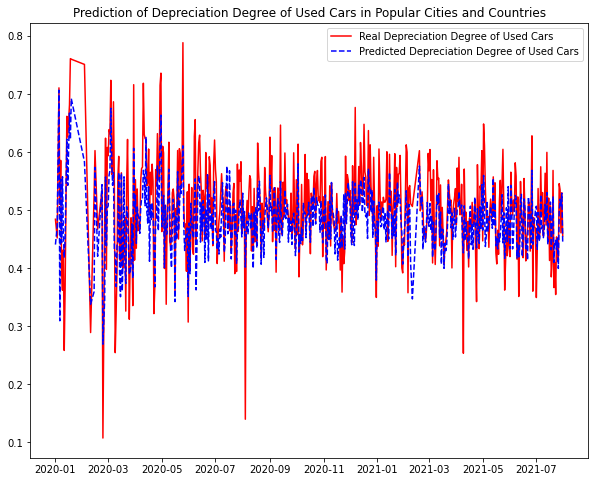

In [80]:
plt.figure(figsize=(10, 8))
city1['predict'] = city_predict
plt.plot(city1['Range'], 'r-')
plt.plot(city1['predict'], 'b--')
plt.legend(['Real Depreciation Degree of Used Cars', 'Predicted Depreciation Degree of Used Cars'])
plt.title('Prediction of Depreciation Degree of Used Cars in Popular Cities and Countries')
plt.savefig('./solve3/Prediction of Depreciation Degree of Used Cars in Popular Cities and Countries.png', dpi=800)

In [81]:
auto_encode.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
batch_normalization_1 (Batch (None, 6)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                70        
Total params: 242
Trainable params: 210
Non-trainable params: 32
______________________________________________________________

In [82]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 4)              96        
_________________________________________________________________
conv1d (Conv1D)              (None, 3, 8)              104       
_________________________________________________________________
average_pooling1d (AveragePo (None, 1, 8)              0         
_________________________________________________________________
bidirectional (Bidirectional (None, 16)                1088      
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,305
Trainable params: 1,305
Non-trainable params: 0
______________________________________________________

In [84]:
nature.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
